# Figure 4: Predictive Performance

## Purpose
Demonstrate superior predictive performance compared to baseline models and clinical risk scores.

## Panels Required:
- **Panel A:** ROC curves for several diseases
- **Panel B:** Calibration plots
- **Panel C:** Performance comparison with baseline models
- **Panel D:** Lead time analysis (how early can ALADYNOULLI detect risk)

## Key Message:
This differentiates from ATM paper, which didn't focus on prediction


In [5]:
# Setup
import sys
import os
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/main_paper_figures')

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300

print("Setup complete")


Setup complete


In [2]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/main_paper_figures/generate_performance_comparison.py

Loading performance comparison data...
Loaded data for 28 diseases
Merged data for 28 diseases

CREATING SUMMARY TABLE
✓ Saved summary table to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/fig5/performance_summary_table.csv

PERFORMANCE SUMMARY TABLE
             Disease       Aladynoulli 10yr (Best) Aladynoulli 1yr (Baseline) Aladynoulli 1yr (Median) Cox 10yr (Baseline)            PCE 10yr        PREVENT 10yr         QRISK3 10yr            GAIL 1yr           GAIL 10yr
               ASCVD  0.733 (0.730-0.736) (Static)        0.881 (0.873-0.889)                    0.879               0.634 0.683 (0.681-0.685) 0.667 (0.665-0.669) 0.702 (0.699-0.705)                 NaN                 NaN
         All Cancers 0.674 (0.670-0.677) (Dynamic)        0.753 (0.737-0.769)                    0.757               0.541                 NaN                 NaN                 NaN                 NaN                 NaN
              Anemia  0.588 (0.584-


FINAL SUMMARY
Total diseases in comparison: 28
Diseases in summary table: 28

Models compared:
  - Aladynoulli 10yr Best: 28 diseases
    - Static chosen: 12 diseases
    - Dynamic chosen: 16 diseases
      Static diseases: Crohns_Disease, ASCVD, Ulcerative_Colitis, Atrial_Fib, Heart_Failure, Rheumatoid_Arthritis, COPD, Anemia, Pneumonia, Depression...
      Dynamic diseases: Multiple_Sclerosis, Prostate_Cancer, Colorectal_Cancer, Bladder_Cancer, Parkinsons, Breast_Cancer, Bipolar_Disorder, Osteoporosis, All_Cancers, Diabetes...
  - Aladynoulli 1yr Baseline: 28 diseases
  - Aladynoulli 1yr Median: 28 diseases
  - Cox 10yr (Baseline): 28 diseases

External scores:
  - PCE 10yr (ASCVD): 1 disease
  - PREVENT 10yr (ASCVD): 1 disease
  - QRISK3 10yr (ASCVD): 1 disease
  - GAIL 1yr (Breast Cancer): 1 disease
  - GAIL 10yr (Breast Cancer): 1 disease


✓ Saved plot to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/washout_evaluation/washout_performance_plot.pdf
✓ Saved summary plot to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/washout_evaluation/washout_drop_summary.pdf

WASHOUT IMPACT SUMMARY

1-Year Predictions (No Washout → 6-Month Washout):
  Mean AUC drop: 0.0112
  Median AUC drop: 0.0026
  Max AUC drop: 0.0584 (Breast_Cancer)
  Min AUC drop: -0.0000 (Colorectal_Cancer)

10-Year Predictions (No Washout → 6-Month Washout):
  Mean AUC drop: 0.0010
  Median AUC drop: 0.0001
  Max AUC drop: 0.0066 (Breast_Cancer)
  Min AUC drop: 0.0000 (Stroke)

✓ All plots saved successfully!


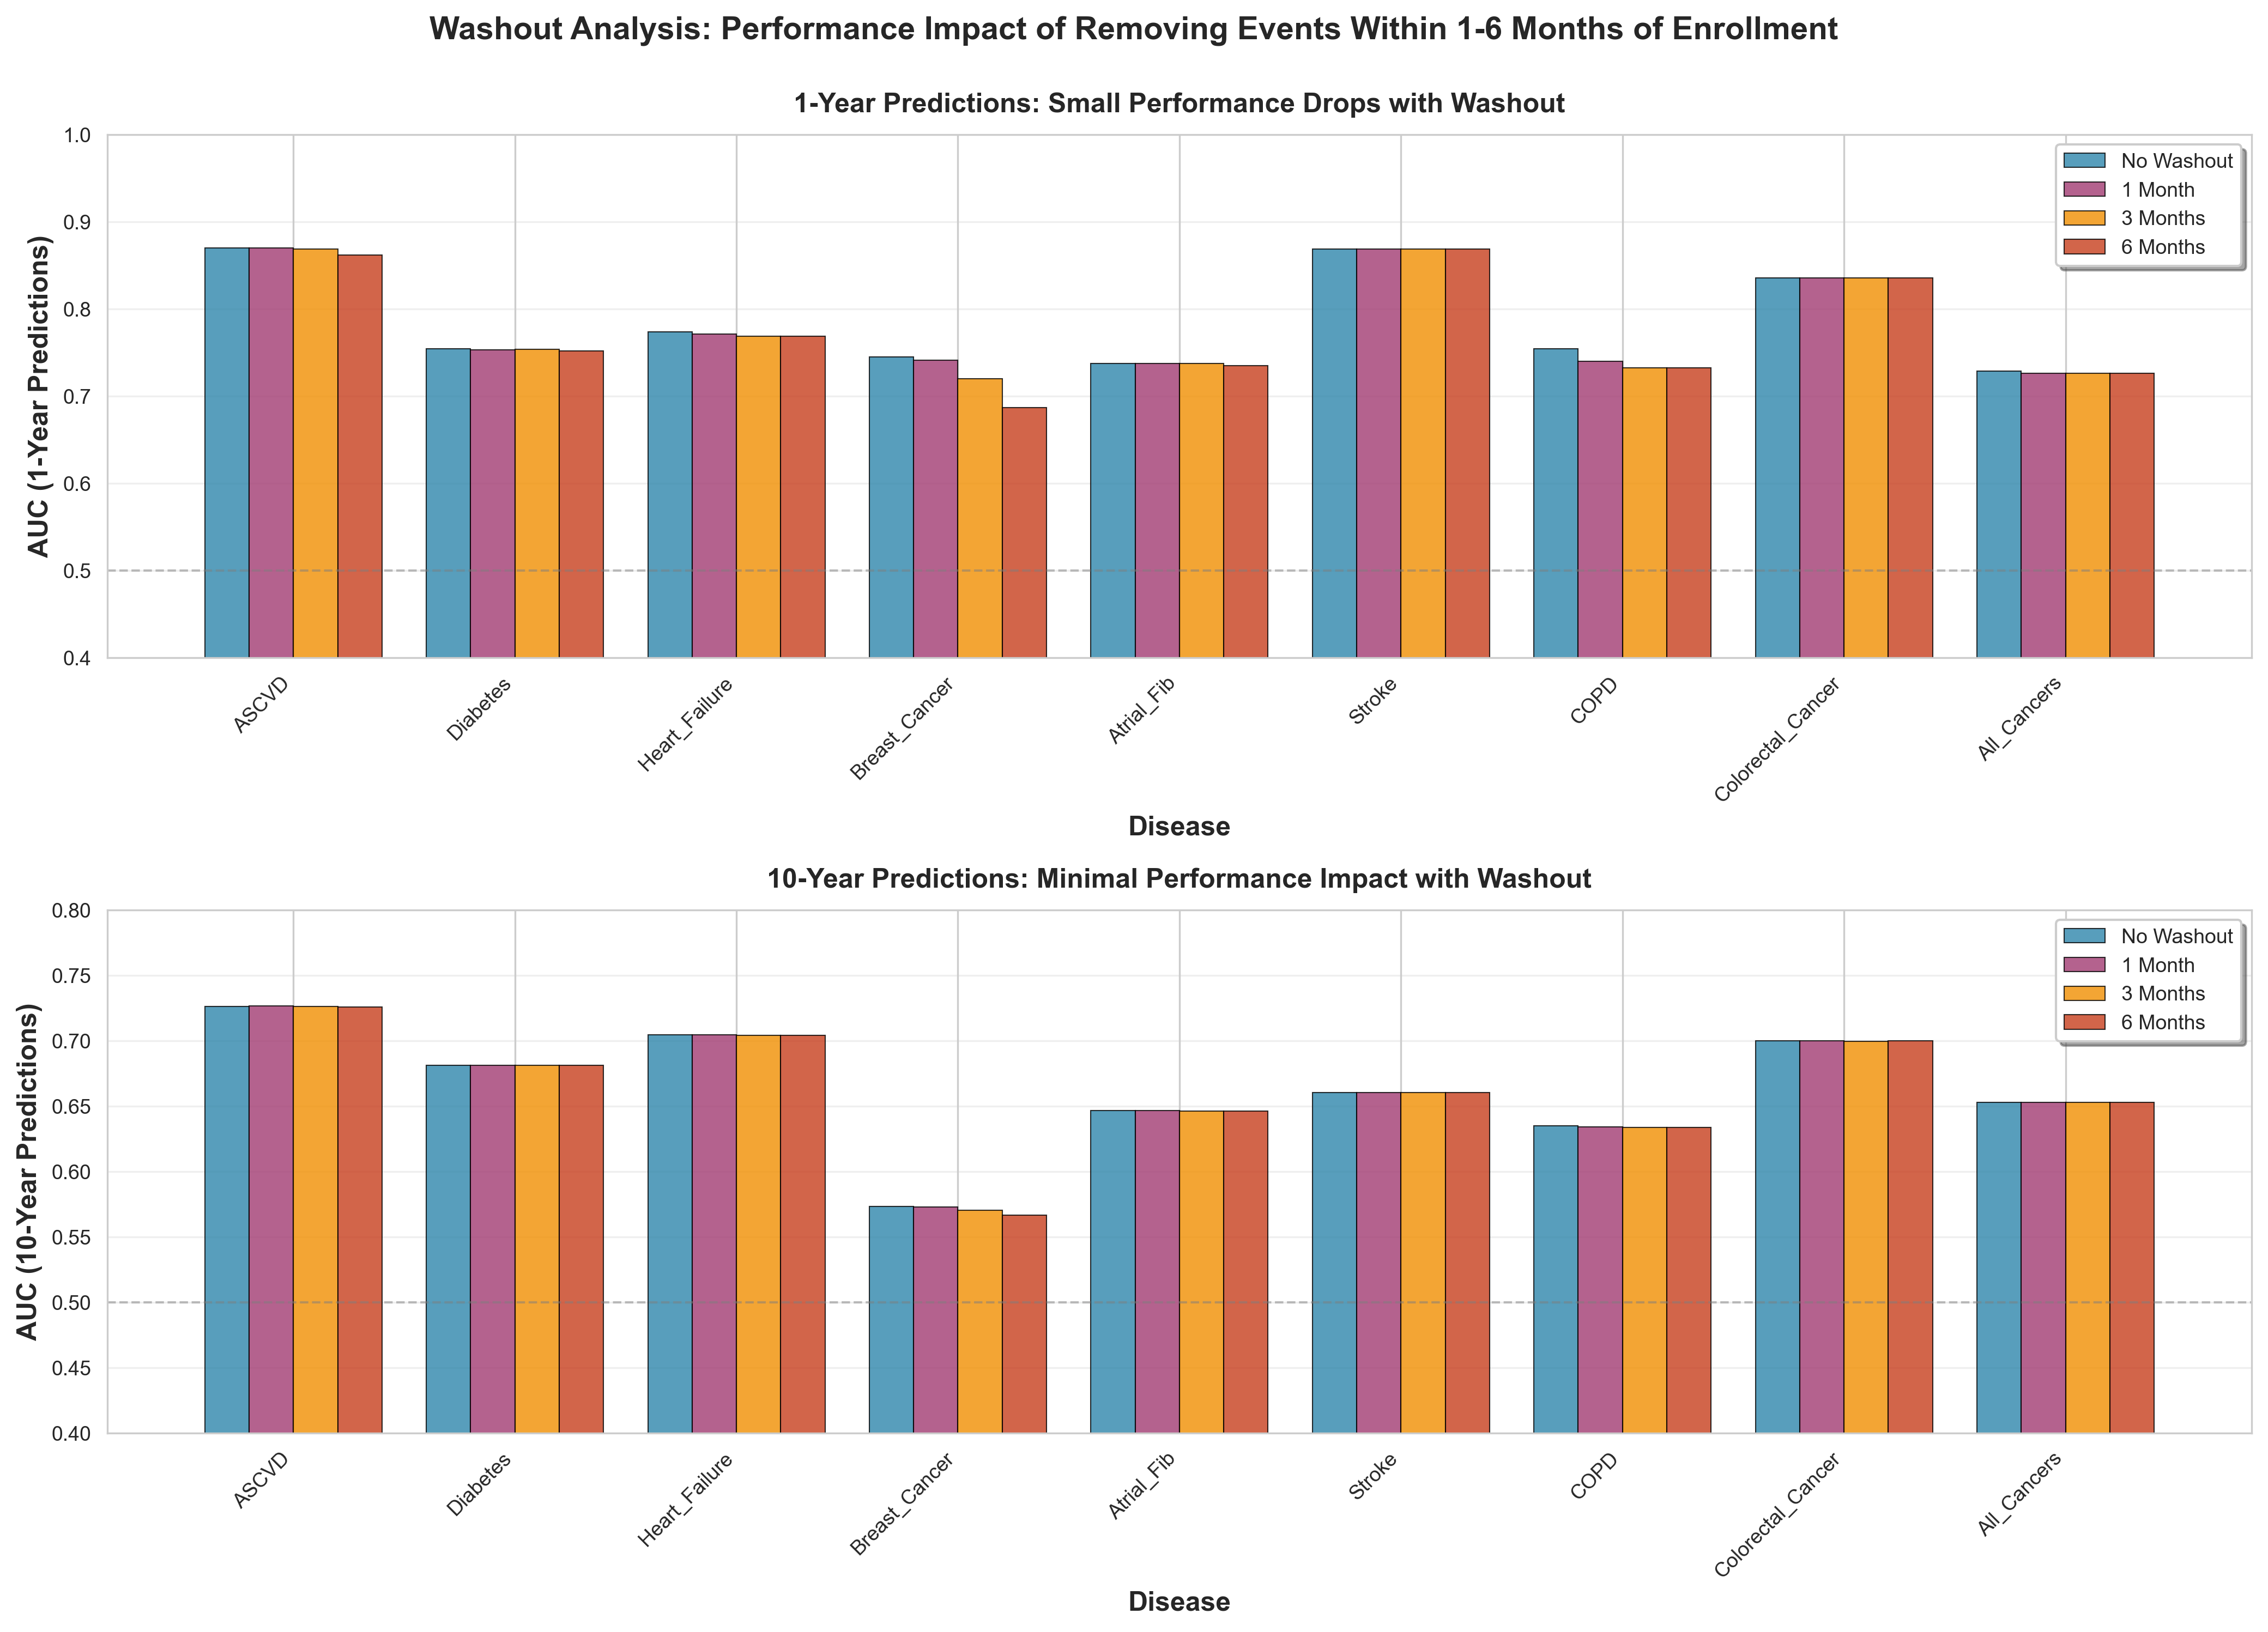

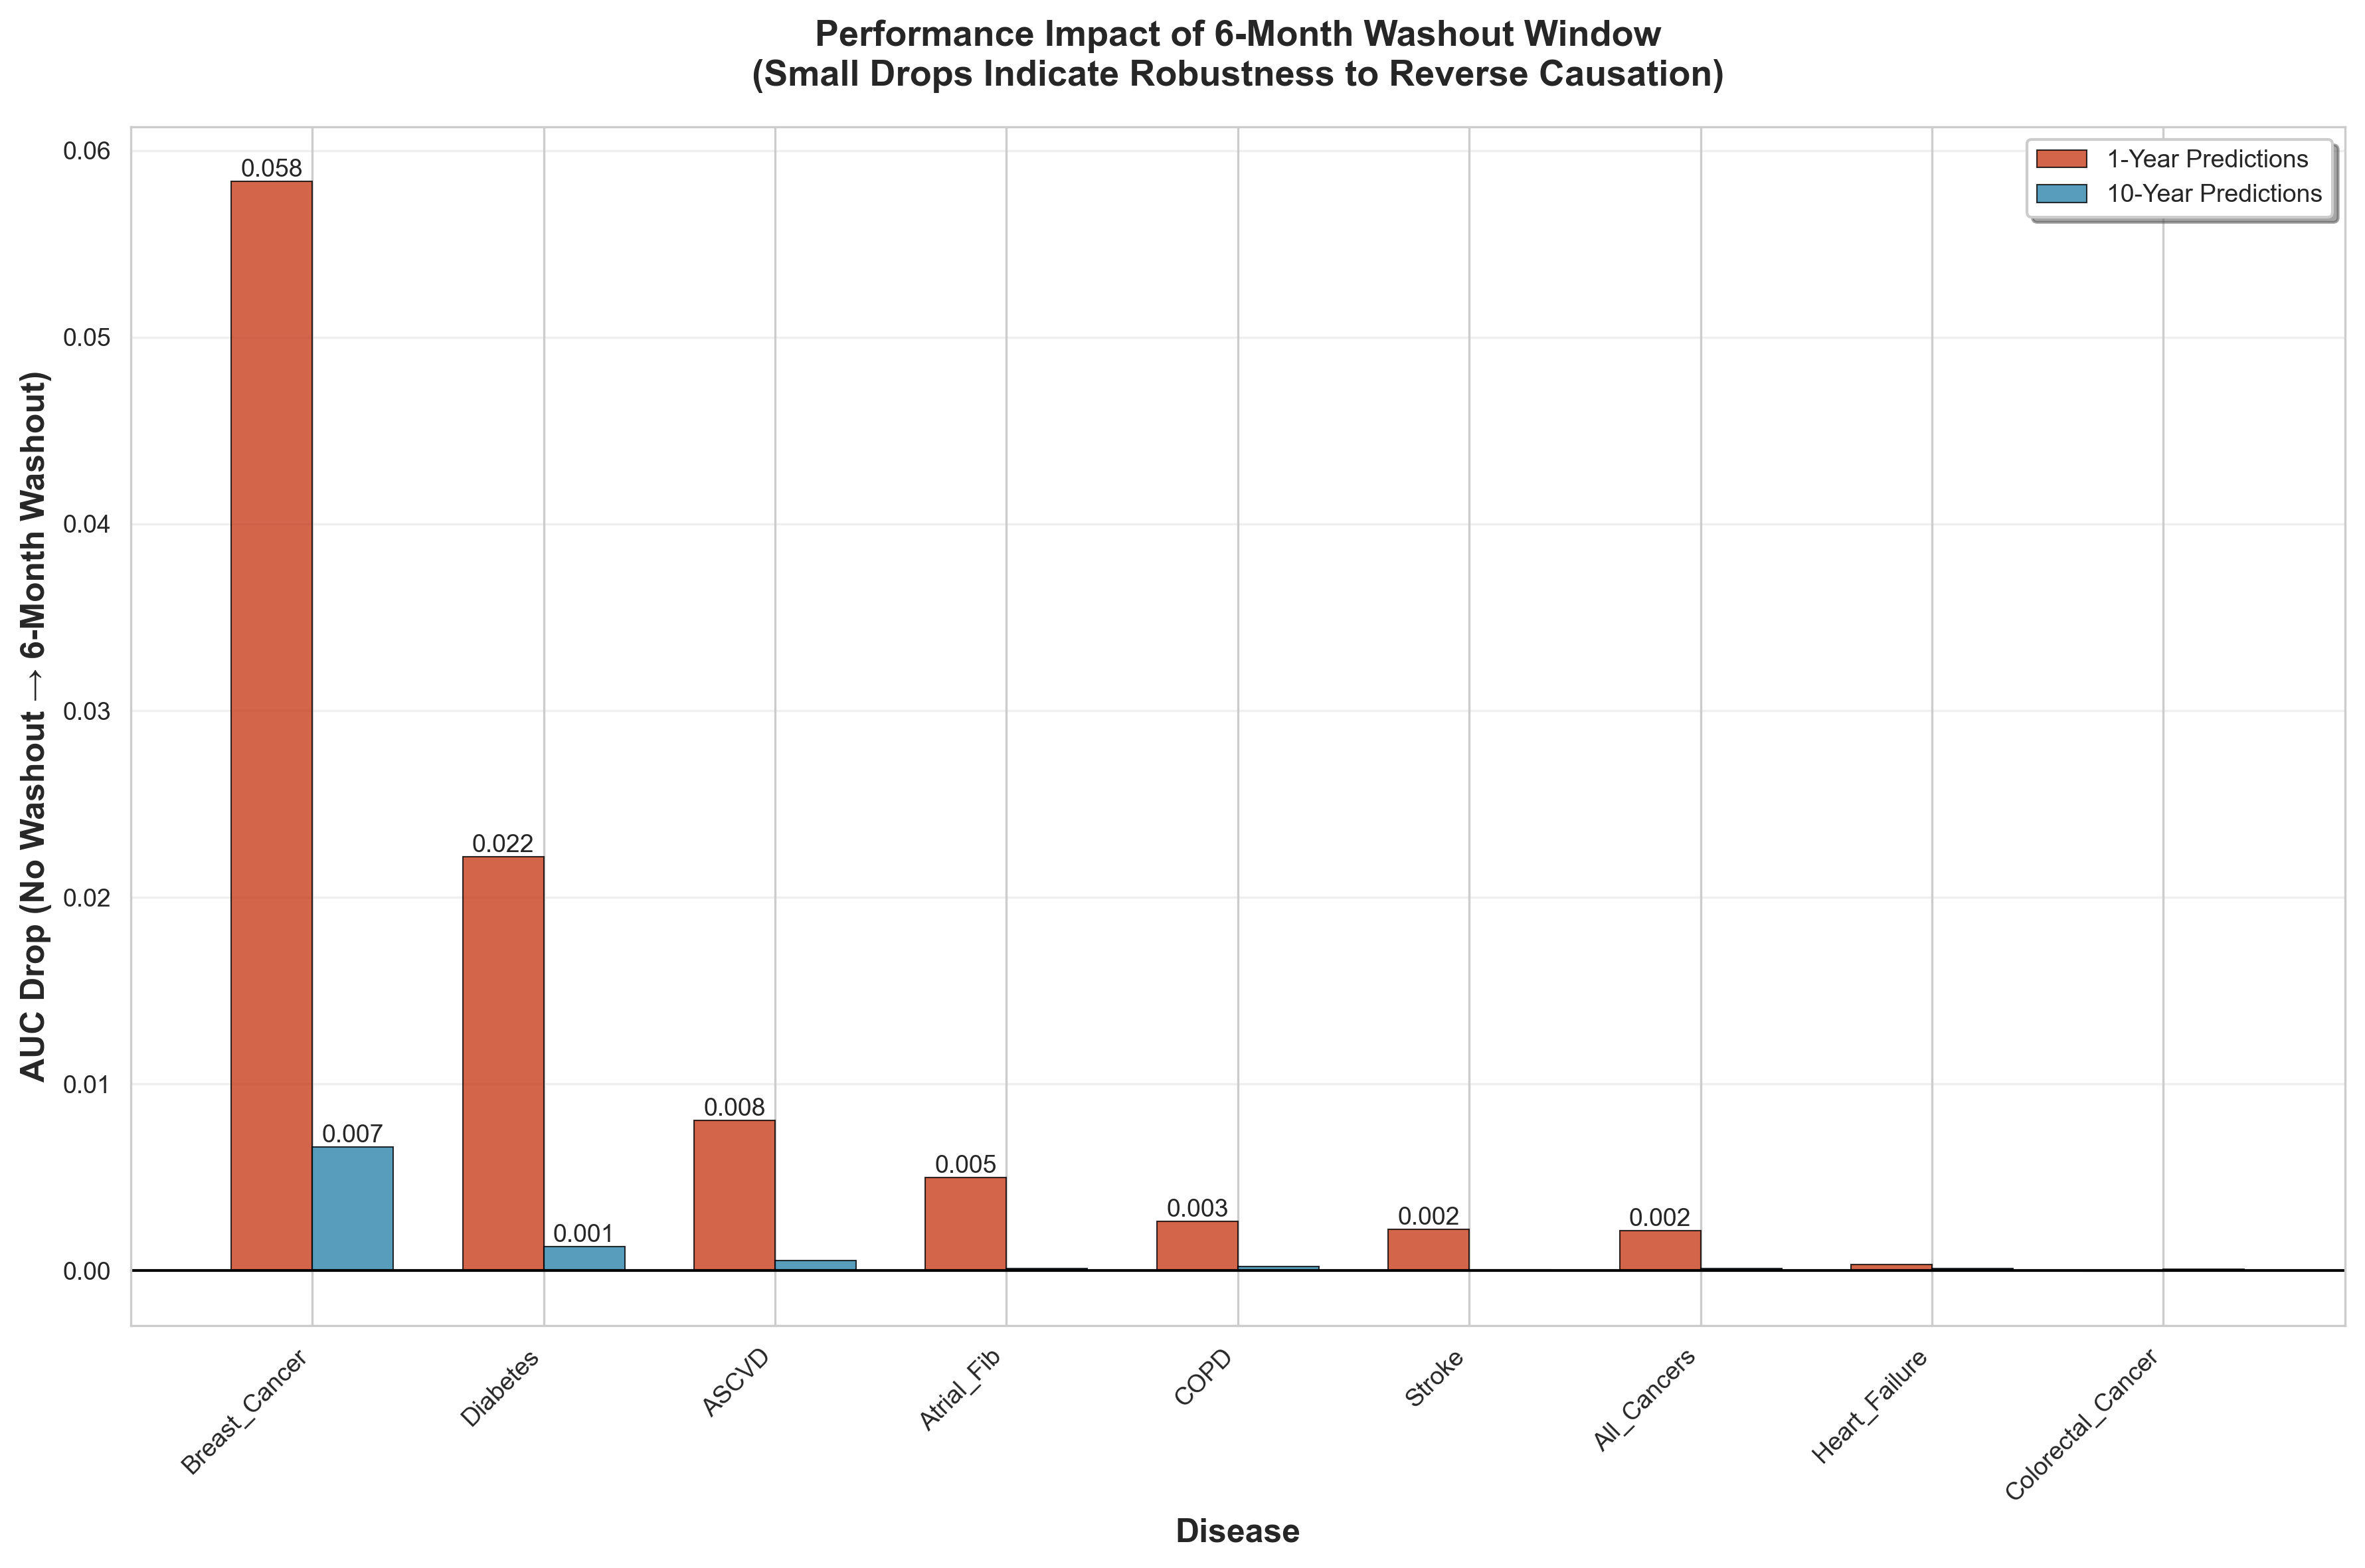

In [22]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/pythonscripts/plot_washout_results.py

✓ Loaded pre-computed pi: torch.Size([50000, 348, 52])
✓ Loaded Y: torch.Size([50000, 348, 52])
✓ Loaded E_corrected: torch.Size([50000, 348])
✓ Loaded cov_df: 50000 patients

Dataset dimensions: 50000 patients × 348 diseases × 52 timepoints

Creating at-risk mask...
  Processing patient 0/50000...
✓ At-risk mask created

  Processing timepoint 0/52...
  Processing timepoint 10/52...
  Processing timepoint 20/52...
  Processing timepoint 30/52...
  Processing timepoint 40/52...
  Processing timepoint 50/52...

✓ Collected 738,708,915 predictions/observations
  Mean predicted: 4.14e-04
  Mean observed: 5.45e-04

Creating calibration plot...

✓ Saved calibration plot to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/fig5/calibration_plots_full_400k.pdf


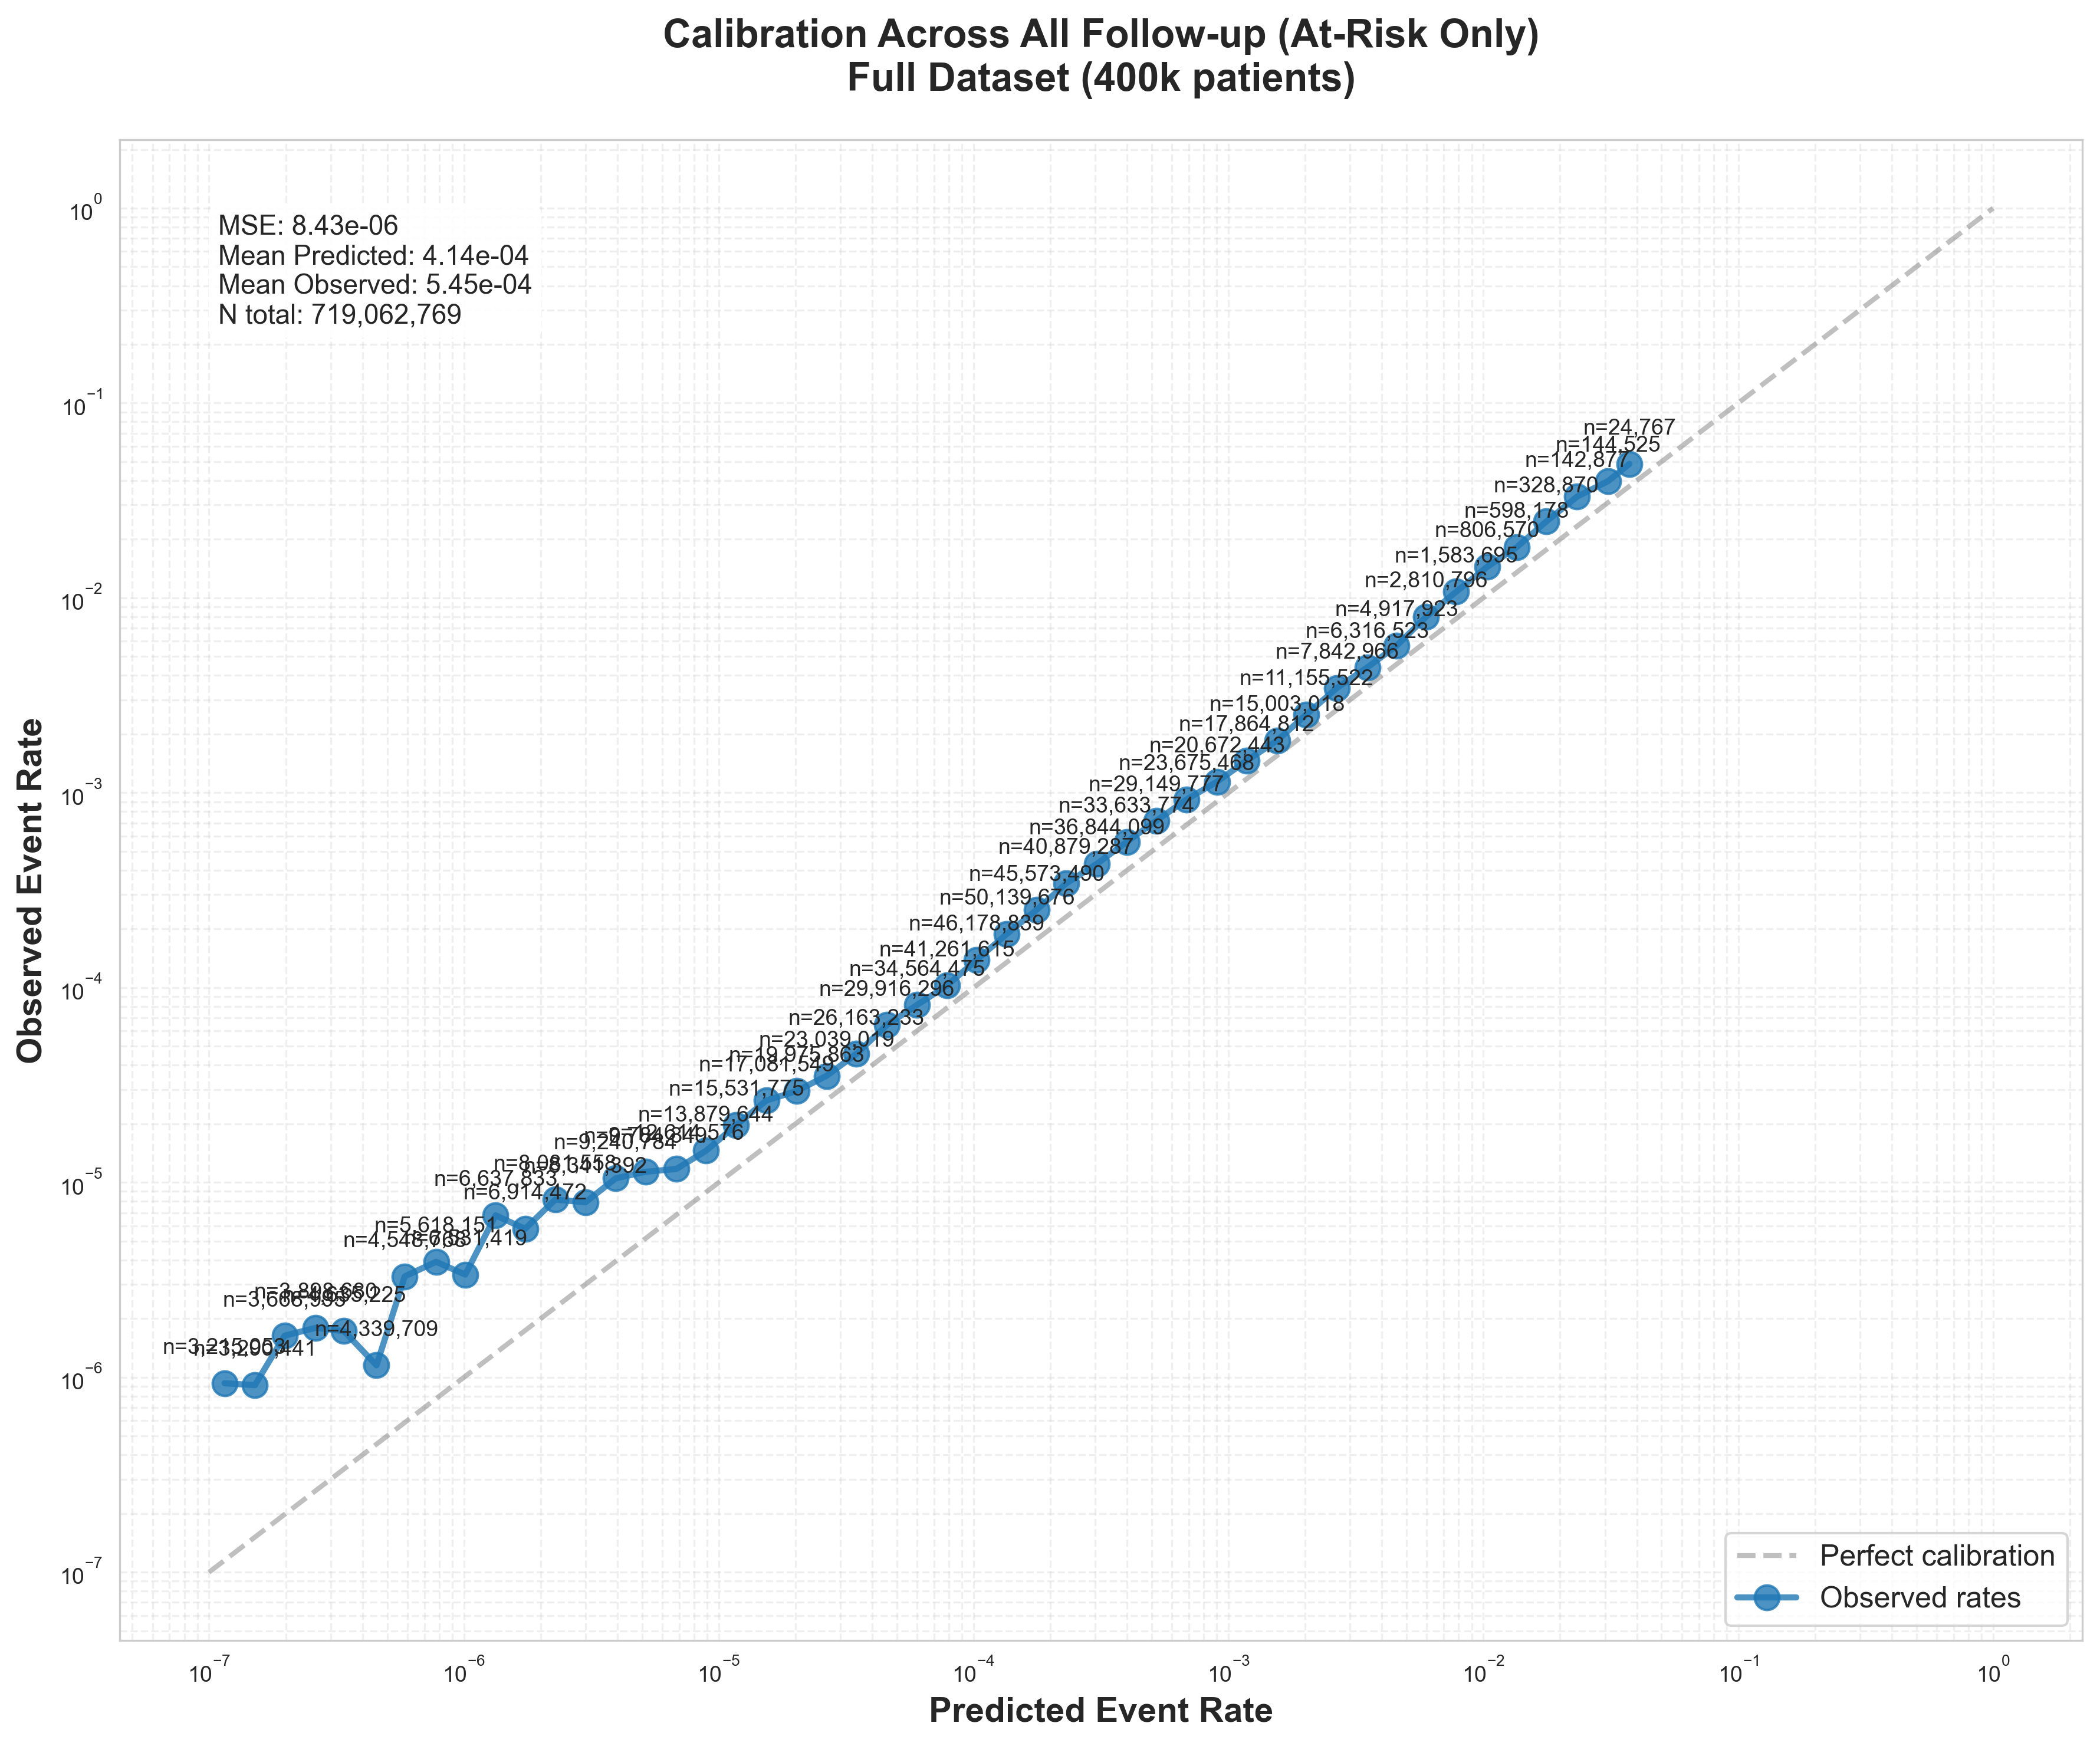

In [16]:
# ============================================================================
# Full Dataset Calibration: 400k patients using pre-computed pi
# ============================================================================

import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Load pre-computed pi (full 400k dataset)
#pi_full = torch.load("/Users/sarahurbut/Library/CloudStorage/Dropbox/censor_e_batchrun_vectorized/pi_fullmode_400k.pt", map_location='cpu', weights_only=False)[:50000]

pi_full = torch.load("/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi_correctedE_vectorized/pi_enroll_fixedphi_sex_FULL.pt", 
           )[:50000]                   
print(f"✓ Loaded pre-computed pi: {pi_full.shape}")

# Load Y (full dataset)
Y_full = torch.load("/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/Y_tensor.pt", 
                    map_location='cpu', weights_only=False)[:50000]
print(f"✓ Loaded Y: {Y_full.shape}")

# Load corrected E matrix (full dataset)
E_corrected_full = torch.load("/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/E_matrix_corrected.pt", 
                              map_location='cpu', weights_only=False)[:50000]
print(f"✓ Loaded E_corrected: {E_corrected_full.shape}")

# Load covariates (full dataset)
cov_df_full = pd.read_csv("/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/baselinagefamh_withpcs.csv")[:50000]
print(f"✓ Loaded cov_df: {len(cov_df_full)} patients")

# Convert to numpy
pi_np = pi_full.detach().numpy()
Y_np = Y_full.detach().numpy()
if torch.is_tensor(E_corrected_full):
    E_corrected_np = E_corrected_full.detach().numpy()
else:
    E_corrected_np = E_corrected_full

N, D, T = Y_np.shape
print(f"\nDataset dimensions: {N} patients × {D} diseases × {T} timepoints")

# Create at_risk mask using corrected E matrix
print("\nCreating at-risk mask...")
at_risk = np.zeros((N, D, T), dtype=bool)
for n in range(N):
    if n % 50000 == 0:
        print(f"  Processing patient {n}/{N}...")
    for d in range(D):
        # Patient is at risk at timepoint t if event/censor time >= t
        at_risk[n, d, :] = (E_corrected_np[n, d] >= np.arange(T))

print("✓ At-risk mask created")

# Collect all predictions and observations (at-risk only)
print("\nCollecting predictions and observations...")
all_pred = []
all_obs = []

for t in range(T):
    if t % 10 == 0:
        print(f"  Processing timepoint {t}/{T}...")
    mask_t = at_risk[:,:,t]
    if mask_t.sum() > 0:
        all_pred.extend(pi_np[:,:,t][mask_t])
        all_obs.extend(Y_np[:,:,t][mask_t])

all_pred = np.array(all_pred)
all_obs = np.array(all_obs)

print(f"\n✓ Collected {len(all_pred):,} predictions/observations")
print(f"  Mean predicted: {all_pred.mean():.2e}")
print(f"  Mean observed: {all_obs.mean():.2e}")

# Create calibration plot
print("\nCreating calibration plot...")
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)

# Create bins in log space
n_bins = 50
min_bin_count = 10000  # Higher threshold for full dataset
use_log_scale = True

if use_log_scale:
    bin_edges = np.logspace(np.log10(max(1e-7, min(all_pred))), 
                          np.log10(max(all_pred)), 
                          n_bins + 1)
else:
    bin_edges = np.linspace(min(all_pred), max(all_pred), n_bins + 1)

# Calculate statistics for each bin
bin_means = []
obs_means = []
counts = []

for i in range(n_bins):
    mask = (all_pred >= bin_edges[i]) & (all_pred < bin_edges[i + 1])
    if np.sum(mask) >= min_bin_count:
        bin_means.append(np.mean(all_pred[mask]))
        obs_means.append(np.mean(all_obs[mask]))
        counts.append(np.sum(mask))

# Plot
if use_log_scale:
    ax.plot([1e-7, 1], [1e-7, 1], '--', color='gray', alpha=0.5, label='Perfect calibration', linewidth=2)
    ax.set_xscale('log')
    ax.set_yscale('log')
else:
    ax.plot([0, max(all_pred)], [0, max(all_pred)], '--', color='gray', alpha=0.5, label='Perfect calibration', linewidth=2)

ax.plot(bin_means, obs_means, 'o-', color='#1f77b4', 
        markersize=10, linewidth=2.5, label='Observed rates', alpha=0.8)

# Add counts as annotations
for i, (x, y, c) in enumerate(zip(bin_means, obs_means, counts)):
    ax.annotate(f'n={c:,}', (x, y), xytext=(0, 12), 
               textcoords='offset points', ha='center', fontsize=9)

# Add summary statistics
mse = np.mean((np.array(bin_means) - np.array(obs_means))**2)
mean_pred = np.mean(all_pred)
mean_obs = np.mean(all_obs)

stats_text = f'MSE: {mse:.2e}\n'
stats_text += f'Mean Predicted: {mean_pred:.2e}\n'
stats_text += f'Mean Observed: {mean_obs:.2e}\n'
stats_text += f'N total: {sum(counts):,}'

ax.text(0.05, 0.95, stats_text,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9),
        fontsize=11)

ax.grid(True, which='both', linestyle='--', alpha=0.3)
ax.set_xlabel('Predicted Event Rate', fontsize=14, fontweight='bold')
ax.set_ylabel('Observed Event Rate', fontsize=14, fontweight='bold')
ax.set_title('Calibration Across All Follow-up (At-Risk Only)\nFull Dataset (400k patients)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=12)

plt.tight_layout()

# Save plot
save_path = "/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/fig5/calibration_plots_full_400k.pdf"
plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')
print(f"\n✓ Saved calibration plot to: {save_path}")

plt.show()
